# PBMC3k: 30% Cells: 1635 Features: 4121

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocess

In [22]:
import os
path = 'C:/Users/jzhou417/Desktop/pbmc3k/'
if os.path.exists(path):
    files = os.listdir(path)
files

['.ipynb_checkpoints',
 '.Rhistory',
 '1',
 '30',
 '50',
 '60',
 '70',
 '90',
 '90new',
 'barcodes.tsv',
 'Comparison-sc10x-3c.ipynb',
 'cooc',
 'cooc.csv',
 'cooc1',
 'cooc_standard',
 'filtered_feature_bc_matrix',
 'genes.tsv',
 'matrix.mtx',
 'pbmc_orign.ipynb',
 'R.txt',
 'RaceID3.csv',
 'RaceID3new.csv',
 'sc10x-3c-sce.rds',
 'sc10x-3c.rds',
 'sc3_results.xls',
 'sc3_results1.xls',
 'server',
 'seurat-R-stan.csv',
 'seurat-R.csv',
 'seurat-R1.csv',
 'seurat-R8.csv',
 'seurat-Rrs1.csv',
 'web_summary.html']

In [23]:
table = pd.read_csv(os.path.join(path, 'seurat-R-stan.csv'))
table.head(10)

,barcode,seurat_clusters
0,AAACATACAACCAC,3
1,AAACATTGAGCTAC,4
2,AAACATTGATCAGC,1
3,AAACCGTGCTTCCG,5
4,AAACCGTGTATGCG,6
5,AAACGCACTGGTAC,1
6,AAACGCTGACCAGT,3
7,AAACGCTGGTTCTT,3
8,AAACGCTGTAGCCA,3
9,AAACGCTGTTTCTG,5


In [24]:
R_10x = pd.read_csv('seurat-Rrs2.csv')
R_10x["barcode"] = R_10x['Unnamed: 0']
R_10x.pop('Unnamed: 0')
newdata = table.merge(R_10x, on='barcode')
newdata['target'] = newdata['seurat_clusters_x'].factorize()[0]

In [25]:
sc3 = pd.read_excel('sc3_results.xls')
sc3_r = table.merge(sc3, on="barcode")
sc3_r['target'] = sc3_r['seurat_clusters'].factorize()[0]

In [26]:
sc3_r.head(10)

,barcode,seurat_clusters,sc3_10_clusters,sc3_10_log2_outlier_score,target
0,AAACATTGAGCTAC,4,8,1.13722,0
1,AAACATTGATCAGC,1,5,0.00000,1
2,AAACCGTGCTTCCG,5,10,0.00000,2
3,AAACGCACTGGTAC,1,5,0.00000,1
4,AAACGCTGACCAGT,3,6,0.00000,3
5,AAACGCTGGTTCTT,3,6,0.00000,3
6,AAACTTGAAAAACG,4,8,0.00000,0
7,AAACTTGATCCAGA,0,5,0.00000,4
8,AAAGAGACGAGATA,1,5,0.00000,1
9,AAAGAGACGCGAGA,2,1,0.00000,5


In [27]:
cooc = pd.read_csv('cooc.csv').T.reset_index()[1:]
cooc["barcode"] = cooc["index"]
cooc["cooc_clusters"] = cooc.loc[:,0]
cooc.pop("index")
cooc.pop(0)
cooc_data = table.merge(cooc, on="barcode")
cooc_data['target'] = cooc_data['seurat_clusters'].factorize()[0]

In [28]:
cooc_data.head(10)

,barcode,seurat_clusters,cooc_clusters,target
0,AAACATTGAGCTAC,4,4,0
1,AAACATTGATCAGC,1,5,1
2,AAACCGTGCTTCCG,5,1,2
3,AAACGCACTGGTAC,1,5,1
4,AAACGCTGACCAGT,3,2,3
5,AAACGCTGGTTCTT,3,2,3
6,AAACTTGAAAAACG,4,4,0
7,AAACTTGATCCAGA,0,5,4
8,AAAGAGACGAGATA,1,5,1
9,AAAGAGACGCGAGA,2,1,5


In [29]:
race = pd.read_csv('RaceID3.csv')
race["barcode"] = race["Unnamed: 0"]
race.pop("Unnamed: 0")
race_data = table.merge(race, on="barcode")
race_data['target'] = race_data['seurat_clusters'].factorize()[0]

In [30]:
race_data.head(10)

,barcode,seurat_clusters,V1,target
0,AAACATTGAGCTAC,4,1,0
1,AAACATTGATCAGC,1,2,1
2,AAACCGTGCTTCCG,5,2,2
3,AAACGCACTGGTAC,1,3,1
4,AAACGCTGACCAGT,3,1,3
5,AAACGCTGGTTCTT,3,34,3
6,AAACTTGAAAAACG,4,1,0
7,AAACTTGATCCAGA,0,4,4
8,AAAGAGACGAGATA,1,3,1
9,AAAGAGACGCGAGA,2,2,5


# Cluster Count

In [31]:
def cluster_counts(df, cluster_name, name):
    print("Cluster counts for {}".format(name))
    groups = df.groupby(by = cluster_name)
    return groups["target"].describe()[['count']]

In [32]:
cluster_counts(sc3_r, 'sc3_10_clusters', '3. sc3 10x')

Cluster counts for 3. sc3 10x


,count
sc3_10_clusters,
1,184.0
2,193.0
3,266.0
4,83.0
5,474.0
6,112.0
7,20.0
8,113.0
9,126.0


In [33]:
cluster_counts(cooc_data, 'seurat_clusters', '4. cooc 10x')

Cluster counts for 4. cooc 10x


,count
seurat_clusters,
0,348.0
1,457.0
2,223.0
3,211.0
4,118.0
5,112.0
6,126.0
7,30.0
8,2.0


In [34]:
cluster_counts(cooc_data, 'cooc_clusters', '4. cooc 10x')

Cluster counts for 4. cooc 10x


,count
cooc_clusters,
1,236.0
2,333.0
3,132.0
4,119.0
5,807.0


# Compare with Seurat

In [35]:
def reorder(df):
    
    dic = {i: np.argmax(df.loc[:,i].values) for i in range(1, len(df.columns)+1)}
    dic = sorted(dic.items(), key = lambda x: x[1])
    df_new = pd.concat([df.loc[:,col] for col, target in dic],axis=1)
    
    # Normalize
    #df_new = df_new.apply(lambda x: x/x.sum(), axis=0)
    
    return df_new

def reorder_seurat(df):
    
    dic = {i: np.argmax(df.loc[:,i].values) for i in range(1, len(df.columns))}
    dic = sorted(dic.items(), key = lambda x: x[1])
    df_new = pd.concat([df.loc[:,col] for col, target in dic],axis=1)
    
    # Normalize
    #df_new = df_new.apply(lambda x: x/x.sum(), axis=0)
    
    return df_new

In [36]:
df_r = pd.crosstab(newdata['target'], newdata['seurat_clusters_y'])
df_r_s = df_r.copy()
df_r_s["sum"] = df_r.sum(axis=1)
df_r_s

seurat_clusters_y,0,1,2,3,4,5,6,7,8,sum
target,,,,,,,,,,
0,0,1,0,0,0,0,0,117,0,118
1,145,233,32,0,45,2,0,0,0,457
2,0,0,0,2,0,0,110,0,0,112
3,6,6,185,0,0,13,0,1,0,211
4,216,30,0,0,102,0,0,0,0,348
5,0,0,0,198,0,0,23,0,2,223
6,0,0,2,0,0,124,0,0,0,126
7,0,0,0,4,0,0,0,0,26,30
8,0,0,0,0,0,0,2,0,0,2


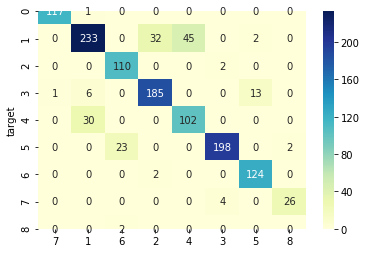

In [37]:
df_r = reorder_seurat(df_r)
sns.heatmap(df_r, cmap="YlGnBu", annot=True, fmt="d")

In [38]:
df_sc3 = pd.crosstab(sc3_r['target'], sc3_r['sc3_10_clusters'])
df_sc3_s = df_sc3.copy()
df_sc3_s["sum"] = df_sc3_s.sum(axis=1)
df_sc3_s

sc3_10_clusters,1,2,3,4,5,6,7,8,9,10,sum
target,,,,,,,,,,,
0,0,0,1,1,2,1,0,113,0,0,118
1,0,0,151,47,251,8,0,0,0,0,457
2,1,0,0,0,0,0,0,0,103,8,112
3,0,71,7,1,15,99,18,0,0,0,211
4,0,0,107,34,205,2,0,0,0,0,348
5,181,0,0,0,0,0,0,0,22,20,223
6,0,122,0,0,0,2,2,0,0,0,126
7,2,0,0,0,0,0,0,0,0,28,30
8,0,0,0,0,1,0,0,0,1,0,2


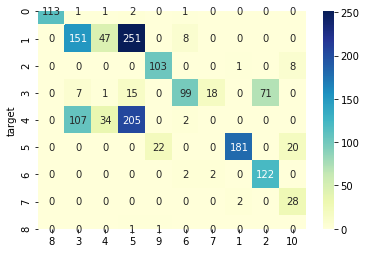

In [39]:
df_sc3 = reorder(df_sc3)
sns.heatmap(df_sc3, cmap="YlGnBu", annot=True, fmt="d")

In [40]:
df_cooc = pd.crosstab(cooc_data['target'], cooc_data[cooc_data['cooc_clusters']<20]['cooc_clusters'])
df_cooc_s = df_cooc.copy()
df_cooc_s["sum"] = df_cooc.sum(axis=1)
df_cooc_s

cooc_clusters,1,2,3,4,5,sum
target,,,,,,
0,0,0,0,115,3,118
1,1,24,1,0,431,457
2,95,0,17,0,0,112
3,0,183,0,1,27,211
4,0,0,0,2,346,348
5,115,0,108,0,0,223
6,0,126,0,0,0,126
7,24,0,5,1,0,30
8,1,0,1,0,0,2


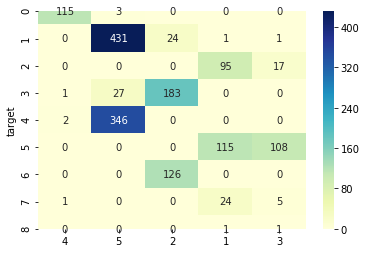

In [41]:
df_cooc = reorder(df_cooc)
sns.heatmap(df_cooc, cmap="YlGnBu", annot=True, fmt="d")

In [42]:
df_race = pd.crosstab(race_data['target'], race_data[race_data['V1']<13]['V1'])
df_race_s = df_race.copy()
df_race_s["sum"] = df_race.sum(axis=1)
df_race_s

V1,1,2,3,4,5,6,7,8,9,10,11,12,sum
target,,,,,,,,,,,,,
0,48,0,9,30,6,0,1,1,7,0,0,1,103
1,50,14,126,46,186,0,1,0,21,1,4,2,451
2,0,104,2,0,1,0,3,0,1,0,0,0,111
3,7,7,101,2,18,0,53,0,12,0,6,0,206
4,50,1,26,167,91,0,0,0,6,0,0,2,343
5,2,86,2,3,3,97,0,0,3,6,2,0,204
6,0,3,6,0,0,0,104,0,1,0,4,0,118
7,3,16,1,0,5,3,0,0,1,1,0,0,30


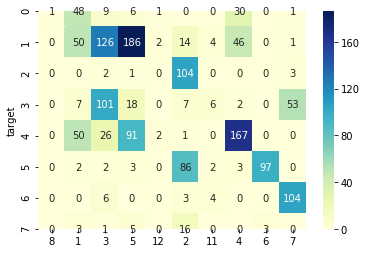

In [43]:
df_race = reorder(df_race)
df_race = df_race.drop(columns = [9,10])
sns.heatmap(df_race, cmap="YlGnBu", annot=True, fmt="d")

# Calculating the metrics

In [44]:
def calc_h_accuracy(df):
    df_norm = df.apply(lambda x: x/x.sum(), axis=0)
    df_entropy = df_norm.apply(lambda x: x*np.log2(x+0.0001))
    return -np.sum(df_entropy.sum(axis=0)) / len(df.columns)

def calc_h_purity(df):
    df_norm = df.apply(lambda x: x/x.sum(), axis=1)
    df_entropy = df_norm.apply(lambda x: x*np.log2(x+0.0001))
    return -np.sum(df_entropy.sum(axis=0)) / len(df)

In [45]:
print("======pbmc3k results======")
print("The entropy of cluster accuracy for seurat R: {:.5f}".format(calc_h_accuracy(df_r)))
print("The entropy of cluster accuracy for sc3: {:.5f}".format(calc_h_accuracy(df_sc3)))
print("The entropy of cluster accuracy for cooc: {:.5f}".format(calc_h_accuracy(df_cooc)))
print("The entropy of cluster accuracy for RaceID3: {:.5f}".format(calc_h_accuracy(df_race)))

======pbmc3k results======
The entropy of cluster accuracy for seurat R: 0.52834
The entropy of cluster accuracy for sc3: 0.79349
The entropy of cluster accuracy for cooc: 1.01573
The entropy of cluster accuracy for RaceID3: 1.31529


In [46]:
print("======pbmc3k results======")
print("The entropy of cluster purity for seurat R: {:.5f}".format(calc_h_purity(df_r)))
print("The entropy of cluster purity for sc3: {:.5f}".format(calc_h_purity(df_sc3)))
print("The entropy of cluster purity for cooc: {:.5f}".format(calc_h_purity(df_cooc)))
print("The entropy of cluster purity for RaceID3: {:.5f}".format(calc_h_purity(df_race)))

======pbmc3k results======
The entropy of cluster purity for seurat R: 0.43099
The entropy of cluster purity for sc3: 0.87206
The entropy of cluster purity for cooc: 0.51337
The entropy of cluster purity for RaceID3: 1.46522


In [47]:
from sklearn.metrics.cluster import adjusted_rand_score
print("======pbmc3k cell lines results======")
print("The ARI for seurat R (resolution=1): {:.5f}".format(adjusted_rand_score(newdata['target'], newdata['seurat_clusters_y'])))
print("The ARI for sc3: {:.5f}".format(adjusted_rand_score(sc3_r['target'], sc3_r['sc3_10_clusters'])))
print("The ARI for cooc: {:.5f}".format(adjusted_rand_score(cooc_data['target'], cooc_data['cooc_clusters'])))
print("The ARI for RaceID3: {:.5f}".format(adjusted_rand_score(race_data['target'], race_data['V1'])))

======pbmc3k cell lines results======
The ARI for seurat R (resolution=1): 0.52679
The ARI for sc3: 0.42399
The ARI for cooc: 0.49906
The ARI for RaceID3: 0.25480
